## NDVI

[Normalized difference vegetation index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)  is a simple graphical indicator that can be used to analyze remote sensing measurements - typically, but not necessarily, from a space platform and on its bases we can assess whether the target being observed contains live green vegetation or not.

![photosyntesis](https://upload.wikimedia.org/wikipedia/commons/7/72/Par_action_spectrum.gif)
Source: [Wipedia](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index#/media/File:Par_action_spectrum.gif)

The pigment in plant leaves, chlorophyll, strongly absorbs visible light (from 0.4 to 0.7 µm) for use in photosynthesis. The cell structure of the leaves, on the other hand, strongly reflects near-infrared light (from 0.7 to 1.1 µm)

    NDVI=(NIR−RED)/(NIR+RED)
    
    NIR - near-infrared (Band 8)
    RED - red (Band 4)
    
By design, the NDVI itself thus varies between -1.0 and +1.0. In general, if there is much more reflected radiation in near-infrared wavelengths than in visible wavelengths, then the vegetation in that pixel is likely to be dense and may contain some type of forest.

* A dense vegetation canopy will tend to positive values (say 0.3 to 0.8) while clouds and snow fields will be characterized by negative values of this index.
* Free standing water (e.g., oceans, seas, lakes and rivers) which have a rather low reflectance in both spectral bands (at least away from shores) and thus result in very low positive or even slightly negative NDVI values,
* Soils which generally exhibit a near-infrared spectral reflectance somewhat larger than the red, and thus tend to also generate rather small positive NDVI values (say 0.1 to 0.2).

![ndvi](https://upload.wikimedia.org/wikipedia/commons/7/76/NDVI_102003.png)
Examaple of NDVI map:NDVI in October over the British Isles (NOAA AVHRR), source: [Wikipedia](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index#/media/File:NDVI_102003.png)

### Calculating NDVI using NumPy

In [1]:
import rasterio
import PIL.Image

with rasterio.open('data/B04-2018-05-06.tiff') as red_file:
    with rasterio.open('data/B08-2018-05-06.tiff') as nir_file:
        red = red_file.read()[0]
        nir = nir_file.read()[0]
        

        ndvi = (nir*1.0-red*1.0)/(nir*1.0+red*1.0) # convert to float
        print(nir)
print(ndvi.max())
print(ndvi.min())

[[57867 62749 64109 ... 30703 27016 26754]
 [58834 62241 64535 ... 22904 24952 27475]
 [58211 57539 57474 ... 28900 28868 27229]
 ...
 [27541 28032 30260 ... 65076 64715 63749]
 [26852 29277 29883 ... 63618 64699 64846]
 [29064 27868 27950 ... 62094 61504 61668]]
0.9663820805841303
-0.4162768343479654


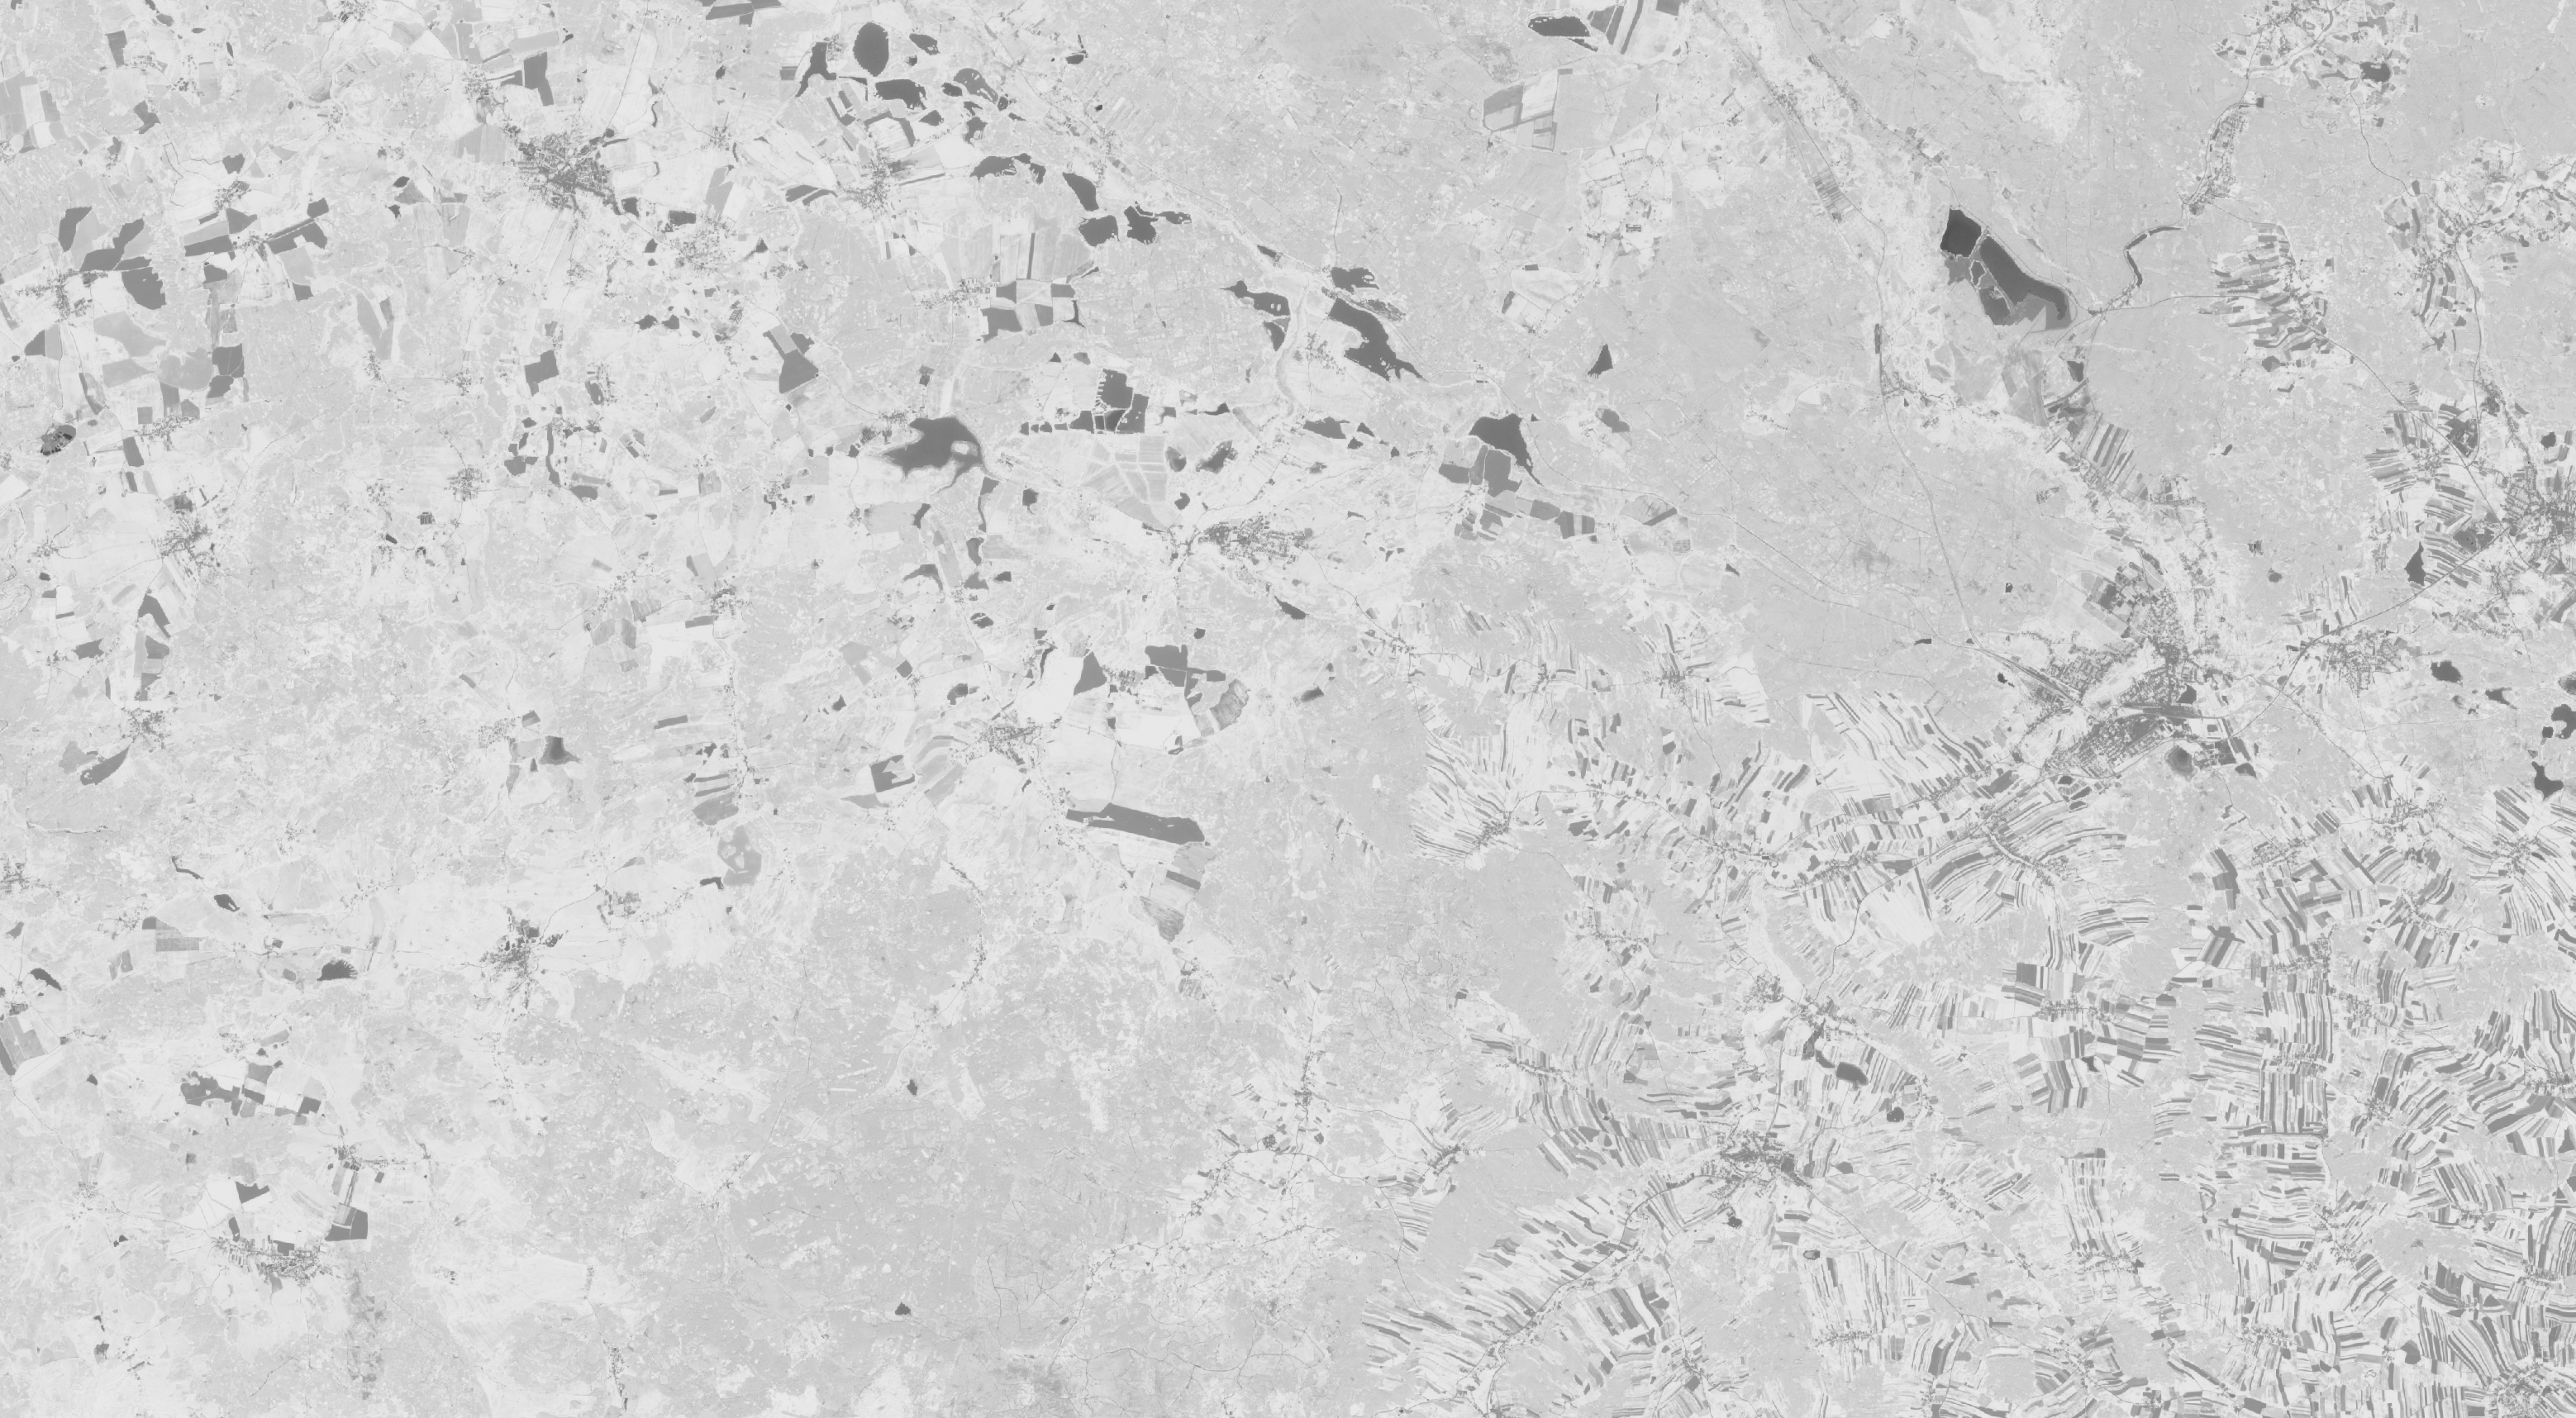

In [2]:
bit8_green = ((ndvi+1)*128).astype('uint8') # convert to 0-256 values
PIL.Image.fromarray(bit8_green, "L")

### Writing data to output file

Let's now create a new raster file, with LWZ compression, encoded in float64 type. The file shall have one band and will use the GeoTIFF format.



In [3]:
# have a look at red_file.meta for inspiration

kwargs = {
    "count": 1,
    "driver": "GTiff",
    "crs": "+init=epsg:4326",
    "dtype": "float32",
    "width": ndvi.shape[1],
    "height": ndvi.shape[0],
    "nodata": -9999,
    "transform": (0.00017964690780272554, 0.0, 14.513969421386719, 0.0, -0.00011842547881016553, 48.866521538507754),
    "compress": "lzw"
}

with rasterio.open('../outputs/ndvi.tif', 'w', **kwargs) as dst:
   dst.write_band(1, ndvi.astype(rasterio.float32))
    

Download the [ndvi.tif](../outputs/ndvi.tif) and display in QGIS.

![images/ndvi.png](images/ndvi.png)

Can you now spot difference between Czech Republic and Austria?

---
[<- RasterIO](01_rasterio.ipynb) | [NDVI interpretation ->](03_ndvi-interpretation.ipynb)